# Data Wrangling or Manipulation in R


In [11]:
#Installing packages
#install.packages("tidyverse")
#install.packages("data.table")
#install.packages("openxlsx")



In [12]:
# Loading packages
library(tidyverse)
library(data.table)
library(openxlsx)

In [13]:
# Data types in R
x <- 3L
a <- 1.5
class(x)
class(a)
y <- "RCC"
class(y)
z <- TRUE
class(z)
is.integer(x)
is.numeric(a)
is.character(y)
is.logical(z)
# Data structure in R
# vector 
numbers <- c(1,2,3)
numbers

# factor
temp_vector <- c("high", "medium", "low")
factor_temp <- factor(temp_vector, order = TRUE, levels = c("low", "medium", "high"))
factor_temp
# matrices
A <- matrix(1:6, nrow = 3, byrow=TRUE)
A

# data frame
df <- data.frame(Position= c(1,2,3), Sports = c("Hockey" , "Baseball", "Tennis"))
df

# List
list1 <- list(numbers, df)
list1

#tibble
tb <- tibble(x = 1:5,
             y = c("A", "B", "C", "D", "E"))
class(tb)




[1] "integer"

[1] "numeric"

[1] "character"

[1] "logical"

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] 1 2 3

[1] high   medium low   
Levels: low < medium < high

1,2
3,4
5,6


Position,Sports
<dbl>,<fct>
1,Hockey
2,Baseball
3,Tennis


Position,Sports
<dbl>,<fct>
1,Hockey
2,Baseball
3,Tennis


[1] "tbl_df"     "tbl"        "data.frame"

# Setting working directory


In [14]:
#Print out the current working directory 
getwd()

#Change the current working directory to the workshop directory
setwd("/home/humaasif/workshopDataWrangling")

#List all the files that exists in your working directory 
list.files()
#dir()

[1] "/home/humaasif/workshopDataWrangling"

[1] "FunctionalAnnotationKEGG.csv"      "Gene_list1-organ.csv"             
[3] "generifs_basic"                    "launch-jlab.sh"                   
[5] "nb_session_6412758.log"            "output"                           
[7] "RCCworkshop.ipynb"                 "RCCworkshopDataManipulation.ipynb"

# Importing Data in R

packages : readr , data.table

In [15]:
# import Gene_list1-organ.csv using read_csv() from the readr package. 
#first argument is path to the file to import
DEGs_rdr <- read_csv("Gene_list1-organ.csv")
#head(DEGs_rdr,2)
# Change the column names
DEGs_rdr2 <- read_csv("Gene_list1-organ.csv", 
                      col_names = c("GeneSymbol","GeneID","Organ", "Timepoint"))
head(DEGs_rdr2,2)
# skip, n_max,col_types arguments 
DEGs_rdr3 <- read_csv("Gene_list1-organ.csv", 
                      col_names = c("GeneSymbol","GeneID","Organ", "Timepoint"),
                      skip = 1, n_max = 2, col_types = "cccc")
DEGs_rdr3

#class(DEGs_rdr3)


Parsed with column specification:
cols(
  From = col_character(),
  To = col_double(),
  organ = col_character(),
  timepoint = col_character()
)
Parsed with column specification:
cols(
  GeneSymbol = col_character(),
  GeneID = col_character(),
  Organ = col_character(),
  Timepoint = col_character()
)


GeneSymbol,GeneID,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>
From,To,organ,timepoint
C4b,12268,BM,h6


GeneSymbol,GeneID,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>
C4b,12268,BM,h6
Olfml3,99543,BM,h6


In [16]:
# Function documentation: To access the documentation in R
#?read_csv
#help(read_csv)

In [17]:
#Importing data in R using fread from data.table package
# query file  "Gene_list1-organ.csv". 
#explicitly specify the class of columns

DEGsGeneList_dt <- fread("Gene_list1-organ.csv", 
                             colClasses = "character", header = TRUE)
colnames2 <- c("GeneSymbol","GeneID","Organ", "Timepoint")
setnames(DEGsGeneList_dt, colnames2)

head(DEGsGeneList_dt,2)
# select, drop , nrows, and skip arguments for columns and rows.

DEGsGeneList_dt2 <- fread("Gene_list1-organ.csv", 
                           colClasses = "character", header = TRUE, select = 1, nrows=2)
DEGsGeneList_dt2
# check the class of data

#class(DEGsGeneList_dt2)

GeneSymbol,GeneID,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>
C4b,12268,BM,h6
Olfml3,99543,BM,h6


From
<chr>
C4b
Olfml3


In [18]:
# Get a quick overview of the data
str(DEGsGeneList_dt)
dim(DEGsGeneList_dt)
head(DEGsGeneList_dt,2)
tail(DEGsGeneList_dt,2)

Classes ‘data.table’ and 'data.frame':	990 obs. of  4 variables:
 $ GeneSymbol: chr  "C4b" "Olfml3" "A1bg" "Iglc1" ...
 $ GeneID    : chr  "12268" "99543" "117586" "110785" ...
 $ Organ     : chr  "BM" "BM" "BM" "BM" ...
 $ Timepoint : chr  "h6" "h6" "h6" "h6" ...
 - attr(*, ".internal.selfref")=<externalptr> 


[1] 990   4

GeneSymbol,GeneID,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>
C4b,12268,BM,h6
Olfml3,99543,BM,h6


GeneSymbol,GeneID,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>
Naxe,246703,HE,h24
Selenop,20363,HE,h24


In [19]:
# compare the execution time to read the files using read_csv() and fread. 
#user cpu time gives the time spent by the current process
system.time(read_csv("Gene_list1-organ.csv"))
system.time(fread("Gene_list1-organ.csv"))

Parsed with column specification:
cols(
  From = col_character(),
  To = col_double(),
  organ = col_character(),
  timepoint = col_character()
)


   user  system elapsed 
  0.005   0.000   0.008 

   user  system elapsed 
  0.001   0.001   0.002 

In [20]:
# importing the GeneRIF database. 

GeneRIF_database1 <- fread("generifs_basic", quote="",
                           colClasses = "character", header = TRUE )
head(GeneRIF_database1, 2)
# To select these columns you need to surround them with backticks or you can rename them
GeneRIF_database_s <- GeneRIF_database1 %>%
select( `#Tax ID`, `Gene ID`)

head(GeneRIF_database_s,2)
# Rename the columns using setnames() or col.names()
colnames <- c("TaxID","GeneID","PubMedID","Last_update_timestamp","GeneRIF") 
GeneRIF_database <- fread("generifs_basic", quote="",
                          colClasses = "character", header = TRUE , 
                          col.names = colnames)
head(GeneRIF_database,2) # note we have just GeneID's here




#Tax ID,Gene ID,PubMed ID (PMID) list,last update timestamp,GeneRIF text
<chr>,<chr>,<chr>,<chr>,<chr>
7,5692769,27190162,2017-11-18 13:38,"we investigated how Azorhizobium caulinodans regulates ROS resistance. We found that in-frame deletions of a gene encoding the putative catalase-peroxidase katG or a gene encoding a LysR-family regulatory protein, oxyR, exhibited increased sensitivity to H2O2 We then showed that OxyR positively regulated katG expression in an H2O2-independent fashion [oxyR]."
7,5692769,29150498,2019-02-02 11:27,We identified a CheZ-like protein among Alphaproteobacteria functioning in chemotaxis and the A. caulinodans-S. rostrata symbiosis [CheZ].


#Tax ID,Gene ID
<chr>,<chr>
7,5692769
7,5692769


TaxID,GeneID,PubMedID,Last_update_timestamp,GeneRIF
<chr>,<chr>,<chr>,<chr>,<chr>
7,5692769,27190162,2017-11-18 13:38,"we investigated how Azorhizobium caulinodans regulates ROS resistance. We found that in-frame deletions of a gene encoding the putative catalase-peroxidase katG or a gene encoding a LysR-family regulatory protein, oxyR, exhibited increased sensitivity to H2O2 We then showed that OxyR positively regulated katG expression in an H2O2-independent fashion [oxyR]."
7,5692769,29150498,2019-02-02 11:27,We identified a CheZ-like protein among Alphaproteobacteria functioning in chemotaxis and the A. caulinodans-S. rostrata symbiosis [CheZ].


# Data manipulation 

package: dplyr, stringr

Filtering and mutating joins in dplyr

Hunting matching strings 



In [21]:
# select the geneIds
DEGsGeneListGeneID <- DEGsGeneList_dt  %>%
select('GeneID') 
head(DEGsGeneListGeneID,2)
# Filter genes that have  GeneRIFs using filtering join : semi_join()
FilteredDEGsID <- DEGsGeneListGeneID %>%
semi_join(GeneRIF_database)
dim(FilteredDEGsID)
head(FilteredDEGsID,2) # just one column i.e. GeneID

# Genes with out GeneRIF
DEGsID_withoutGeneRIF <- DEGsGeneListGeneID %>%
anti_join(GeneRIF_database)
dim(DEGsID_withoutGeneRIF)


GeneID
<chr>
12268
99543


Joining, by = "GeneID"


[1] 866   1

GeneID
<chr>
12268
117586


Joining, by = "GeneID"


[1] 124   1

In [22]:
# Add GeneRIFs for the filtered genes using mutating join : inner_join() 
# check the number of columns in the output

FilteredDEGsWithGeneRIF <- GeneRIF_database %>%
                                    inner_join(FilteredDEGsID)

head(FilteredDEGsWithGeneRIF,2)
dim(FilteredDEGsWithGeneRIF)  

# order is not imp
x <- FilteredDEGsID %>%
    inner_join(GeneRIF_database)
head(x,2)
dim(x)

Joining, by = "GeneID"


TaxID,GeneID,PubMedID,Last_update_timestamp,GeneRIF
<chr>,<chr>,<chr>,<chr>,<chr>
10090,11421,12003835,2010-01-21 00:00,data suggest that ACE is essential to ANG II formation in the vascular space
10090,11421,12167603,2010-01-21 00:00,"urine-concentrating defect in mice with absence of tissue ACE is associated with downregulation of key urea, salt, and water transport proteins"


[1] 45448     5

Joining, by = "GeneID"


GeneID,TaxID,PubMedID,Last_update_timestamp,GeneRIF
<chr>,<chr>,<chr>,<chr>,<chr>
12268,10090,11726230,2010-01-21 00:00,C4 modulates interstitial inflammation in experimental glomerulonephritis.
12268,10090,11801636,2010-01-21 00:00,Complement C4 provides an important protective role against the development of systemic lupus erythematosus.


[1] 45448     5

In [23]:
# find Genes based on taxonomy. see how Pipe operators link filter, select and mutate functions 
FilteredDEGsWithGeneRIF_taxID <- FilteredDEGsWithGeneRIF %>%
                                filter(TaxID %in% c(9606, 10090)) %>%
                                select(-Last_update_timestamp) %>%
                                mutate(TaxID= ifelse(10090, "M.musculus", "Homo sapiens")) 

head(FilteredDEGsWithGeneRIF_taxID,2)

# try transmute. you will get same result as you get with select and mutate
taxID_tM <- FilteredDEGsWithGeneRIF %>%
                                filter(TaxID %in% c(9606, 10090)) %>%
                                transmute(TaxID, GeneID,PubMedID, GeneRIF, 
                                          TaxID= ifelse(10090, "M.musculus", "Homo sapiens"))
head(taxID_tM,2)  



# Add gene symbols using left_join : another mutating join that we discussed
DEGsWithSymbols <- FilteredDEGsWithGeneRIF_taxID  %>%
                      left_join(DEGsGeneList_dt) %>%
                      select(TaxID, GeneID, GeneSymbol,PubMedID, GeneRIF, Organ, Timepoint )
head(DEGsWithSymbols,2)
#dim(DEGsWithSymbols)



TaxID,GeneID,PubMedID,GeneRIF
<chr>,<chr>,<chr>,<chr>
M.musculus,11421,12003835,data suggest that ACE is essential to ANG II formation in the vascular space
M.musculus,11421,12167603,"urine-concentrating defect in mice with absence of tissue ACE is associated with downregulation of key urea, salt, and water transport proteins"


TaxID,GeneID,PubMedID,GeneRIF
<chr>,<chr>,<chr>,<chr>
M.musculus,11421,12003835,data suggest that ACE is essential to ANG II formation in the vascular space
M.musculus,11421,12167603,"urine-concentrating defect in mice with absence of tissue ACE is associated with downregulation of key urea, salt, and water transport proteins"


Joining, by = "GeneID"


TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
M.musculus,11421,Ace,12003835,data suggest that ACE is essential to ANG II formation in the vascular space,BM,h24
M.musculus,11421,Ace,12167603,"urine-concentrating defect in mice with absence of tissue ACE is associated with downregulation of key urea, salt, and water transport proteins",BM,h24


In [24]:
# Find genes involved in a particular disease. 
DEGsGeneRIF_PD <- DEGsWithSymbols %>%
                 mutate(Disease1 = str_detect(GeneRIF, 
                                   regex("\\bsepsis\\b", ignore_case = TRUE)))

head(DEGsGeneRIF_PD,2)


DEGsGeneRIF_PD1 <- DEGsWithSymbols %>%
                 mutate(Disease1 = ifelse(str_detect(GeneRIF, 
                                    regex("\\bsepsis\\b", ignore_case = TRUE)),
                                    "sepsis",0))

tail(DEGsGeneRIF_PD1,2)

# lets try with another disease
DEGs_output <- DEGsGeneRIF_PD1 %>%
                    mutate(Disease2 = ifelse(str_detect(GeneRIF, 
                                                   regex("\\binflammation\\b", ignore_case = TRUE)),
                                                    "inflammation",0))

tail(DEGs_output,2)

TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint,Disease1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
M.musculus,11421,Ace,12003835,data suggest that ACE is essential to ANG II formation in the vascular space,BM,h24,FALSE
M.musculus,11421,Ace,12167603,"urine-concentrating defect in mice with absence of tissue ACE is associated with downregulation of key urea, salt, and water transport proteins",BM,h24,FALSE


,TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint,Disease1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
45447,M.musculus,100038882,Isg15,29891555,this study shows that cysteine-reactive free ISG15 generates IL-1beta-producing CD8alpha(+) dendritic cells at the site of infection,BM,h12,0
45448,M.musculus,100038882,Isg15,31772204,ISG15 modifies extracellular and mitochondrial proteins during Listeria monocytogenes infection.,BM,h12,0


,TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint,Disease1,Disease2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
45447,M.musculus,100038882,Isg15,29891555,this study shows that cysteine-reactive free ISG15 generates IL-1beta-producing CD8alpha(+) dendritic cells at the site of infection,BM,h12,0,0
45448,M.musculus,100038882,Isg15,31772204,ISG15 modifies extracellular and mitochondrial proteins during Listeria monocytogenes infection.,BM,h12,0,0


# Aggregating data

In [25]:
# lets count GeneRIF with disease 1 using group_by() and count()
DEGs_output %>%
filter(Disease1 != 0) %>%
count()

# count GeneRIF with disease  2
DEGs_output %>%
filter(Disease2 != 0) %>%
count()

# GeneRIF with disease 1 and disease 2
DEGs_output %>%
filter(Disease1 != 0, Disease2 != 0) %>%
count()




n
<int>
252


n
<int>
2026


n
<int>
16


In [26]:
# count Total GeneRIFs (with and with out disease 1) by genes
# Filter GeneRIFs  with Disease 1
 
DEGSWithDisease1 <- DEGsWithSymbols %>%
                    filter(str_detect(GeneRIF, regex("\\bsepsis\\b", ignore_case = TRUE)))

head(DEGSWithDisease1,2)

# Filter GeneRIFs without Disease 1
DEGSWithoutDisease1 <- DEGsWithSymbols %>%
                    filter(str_detect(GeneRIF, regex("\\bsepsis\\b", ignore_case = TRUE), negate=TRUE))

# count GeneRIfs by gene
DEGSWithDisease1Count <- DEGSWithDisease1 %>%
            group_by(GeneID) %>%
            mutate(GeneRIF_D1 = n())%>%
            ungroup() %>%
            select(GeneID,GeneRIF_D1) %>%
            distinct() 

head(DEGSWithDisease1Count,2)

# count Total GeneRIF (with and with out disease 1) by genes
TotalGeneRIFCountByDEGs <- DEGsWithSymbols %>%
            group_by(GeneID) %>%
            mutate(GeneRIF_Total = n()) %>%
            ungroup() %>%
            select(GeneID,GeneRIF_Total) %>%
            distinct() 

dim(TotalGeneRIFCountByDEGs)
head(TotalGeneRIFCountByDEGs,3)



TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
M.musculus,11450,Adipoq,18628355,these data suggest a critical role of adiponectin as a modulator of survival and endothelial inflammation in experimental sepsis,BM,h24
M.musculus,11450,Adipoq,22258235,Data suggest a protective role of adiponectin in diminishing microvascular organ-specific endothelial cell activation during sepsis.,BM,h24


GeneID,GeneRIF_D1
<chr>,<int>
11450,3
11491,2


[1] 866   2

GeneID,GeneRIF_Total
<chr>,<int>
11421,84
11423,84
11425,1


In [27]:
# join Total GeneRIF count and GeneRIF count with disease 1
SummaryGeneRIFCountByDEGs <- TotalGeneRIFCountByDEGs %>%
                full_join(DEGSWithDisease1Count) %>%
                full_join(DEGsGeneList_dt, by = "GeneID")

head(SummaryGeneRIFCountByDEGs,2)

Joining, by = "GeneID"


GeneID,GeneRIF_Total,GeneRIF_D1,GeneSymbol,Organ,Timepoint
<chr>,<int>,<int>,<chr>,<chr>,<chr>
11421,84,NA,Ace,BM,h24
11423,84,NA,Ache,LU,h12


# Exporting Data

In [28]:

#create an output folder to save files
dir.create("output")

Warning message in dir.create("output"):
“'output' already exists”

In [29]:
# write data using fwrite
fwrite(DEGs_output,str_c(getwd(),"/output/DEGs_GeneRIF.csv"))

# try with write_csv()
write_csv(DEGs_output,str_c(getwd(),"/output/DEGs_GeneRIF_readr.csv"))

# check output files
dir(str_c(getwd(),"/output/"))

[1] "DEGs_GeneRIF_readr.csv"           "DEGs_GeneRIF.csv"                
 [3] "DEGs_Test_dt.csv"                 "DEGs_Test_readr.csv"             
 [5] "FunctionalAnnotationPlot.pdf"     "GeneRIFbarplot.pdf"              
 [7] "GeneRIFscatterplotWithNames.pdf"  "GeneRIFsPlotbyOrgan.pdf"         
 [9] "GeneRIFsPlotbyOrganTimepoint.pdf" "SummaryGeneRIFCountByDEGs.csv"   
[11] "workshopOutputFile.xlsx"

In [30]:
# compare the execution time to write the files
system.time(write_csv(DEGs_output, "output/DEGs_Test_readr.csv"))
system.time(fwrite(DEGs_output,"output/DEGs_Test_dt.csv"))




   user  system elapsed 
  0.352   0.009   0.411 

   user  system elapsed 
  0.031   0.004   0.064 

In [31]:
# write the summary output to a file
fwrite(SummaryGeneRIFCountByDEGs,str_c(getwd(),"/output/SummaryGeneRIFCountByDEGs.csv"),na="NA")

In [32]:
# write the two files into excel spreadsheets

outputFiles <- list("DEGSWithGeneRIF" = DEGs_output, "SummaryGeneRIFCountByGene" = SummaryGeneRIFCountByDEGs)
write.xlsx(outputFiles, file = str_c(getwd(),"/output/workshopOutputFile.xlsx"), keepNA=TRUE)

Note: zip::zip() is deprecated, please use zip::zipr() instead


# Sanity Check

NCBI gene database

In [33]:
# lets define a function for sanity check. the only argument it will take will be GeneID 
sanityCheck <- function(x){
    DEGsWithSymbols %>%
filter(GeneID == x)
}
# Genes without GeneRIF
sanityCheck("99543")
sanityCheck("110785")
# Genes with GeneRIF
sanityCheck("117586")
#sanityCheck("12268")
# genes without Disease 1
sanityCheck("11425")
sanityCheck("57319")



TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
M.musculus,117586,A1bg,16723264,"Expression of P5 protein cDNA #5 is liver-specific, sexually dimorphic, age-dependent, and may be involved in hepatocyte hyperplasia and liver enlargement.",BM,h6


TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
M.musculus,11425,Apoc4,12032151,regulated exprsesion of gene cluster in macrophages,BM,h6


TaxID,GeneID,GeneSymbol,PubMedID,GeneRIF,Organ,Timepoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
M.musculus,57319,Smpdl3a,26792860,The structural basis for SMPDL3A substrate specificity resolve by X-ray crystallography.,BM,h12


# Data visualization

In [34]:
# prepare data for visualization
head(SummaryGeneRIFCountByDEGs)
# lets filter most frequent genes with disease annotation
## fct_reorder() from forcats package in tidyverse imp for 
#reordering  gene symbol based on number of GeneRIFs 
GeneRIF_Disease1_Count <-  SummaryGeneRIFCountByDEGs %>%
arrange(desc(GeneRIF_D1))%>%
filter(GeneRIF_D1 > 1)  %>%
mutate(GeneSymbol2 = fct_reorder(GeneSymbol,GeneRIF_D1)) 

#dim(GeneRIF_Disease1_Count)


# lets take most frequent genes with disease annotation
GeneRIF_Disease1_Plot <- head(GeneRIF_Disease1_Count,10)




GeneID,GeneRIF_Total,GeneRIF_D1,GeneSymbol,Organ,Timepoint
<chr>,<int>,<int>,<chr>,<chr>,<chr>
11421,84,NA,Ace,BM,h24
11423,84,NA,Ache,LU,h12
11425,1,NA,Apoc4,BM,h6
11450,423,3,Adipoq,BM,h24
11491,199,2,Adam17,HE,h6
11502,17,NA,Adam9,BM,h24


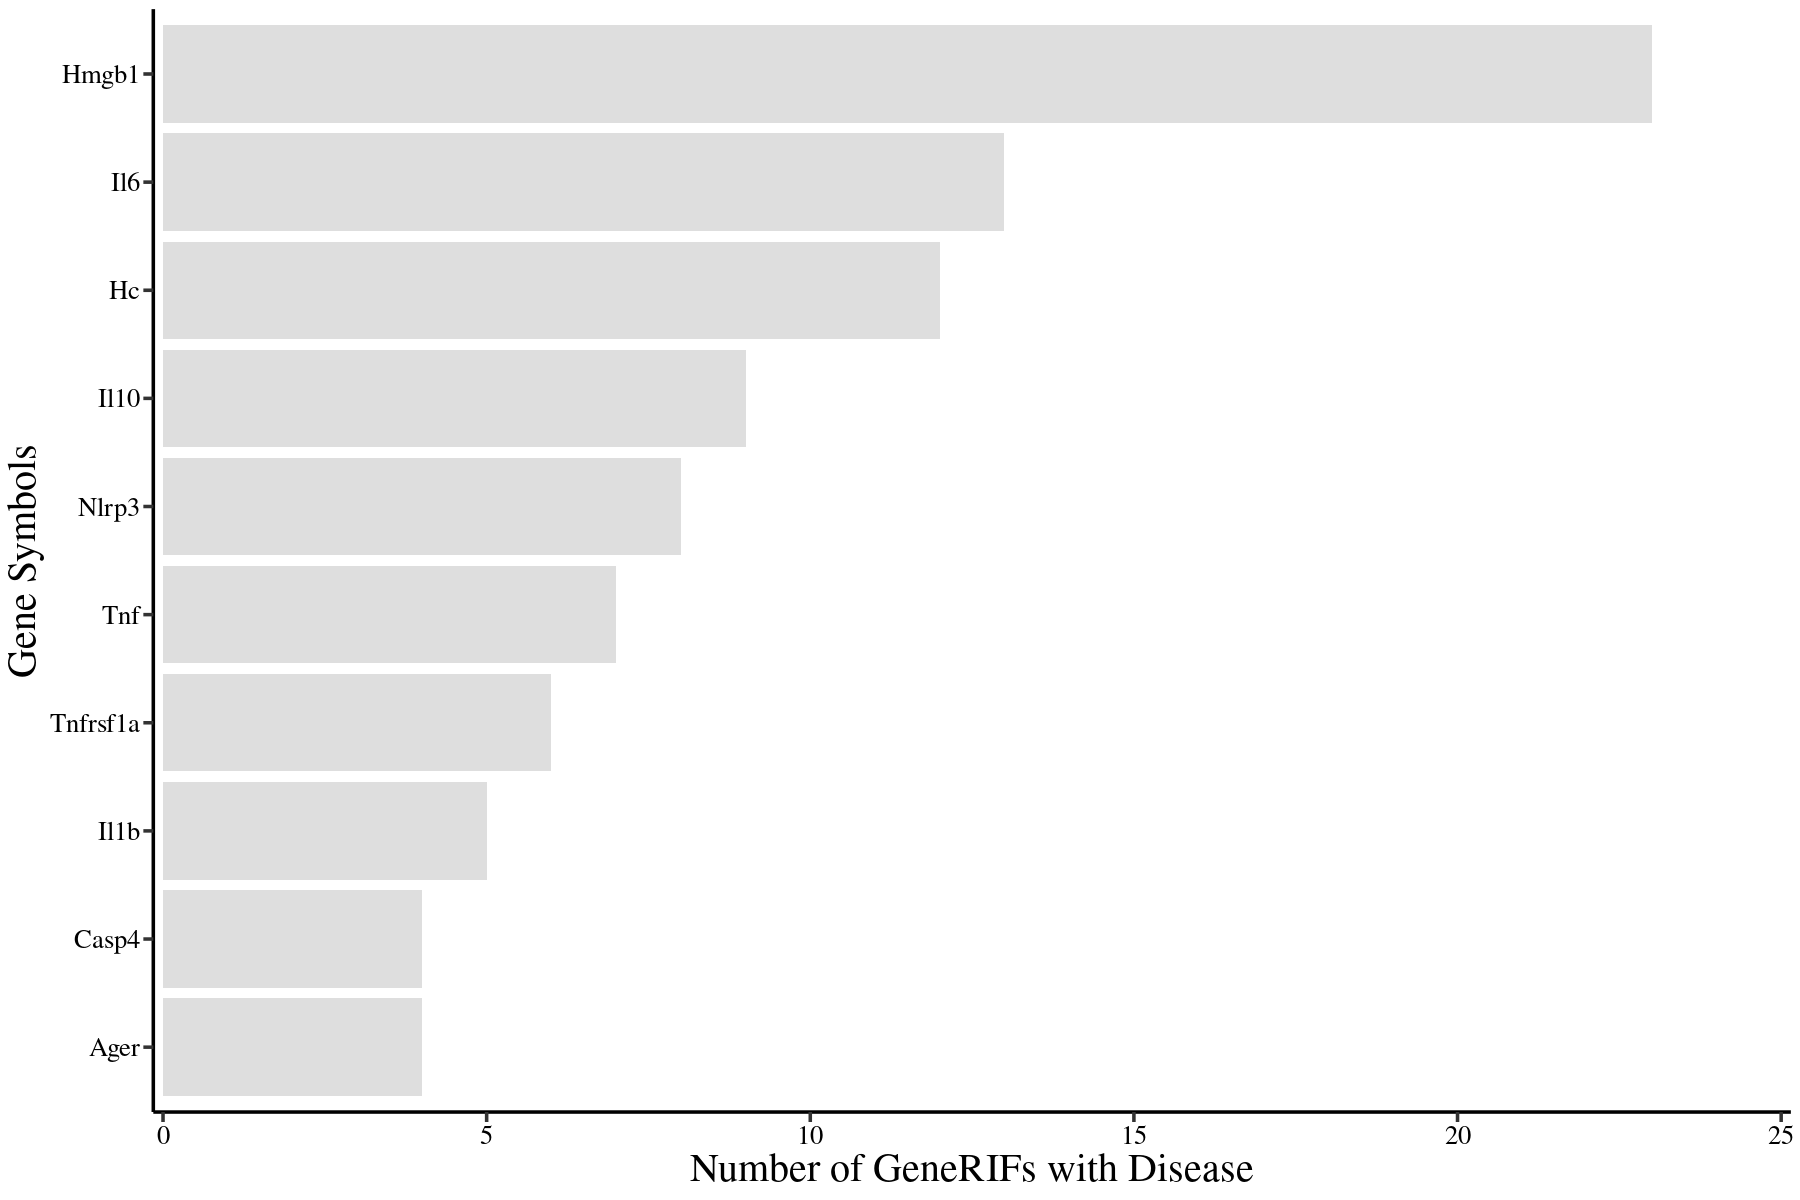

In [35]:
# lets make a barplot
options(repr.plot.width = 15, repr.plot.height =10)
plot <- ggplot(GeneRIF_Disease1_Plot, aes(GeneSymbol2, GeneRIF_D1)) + 
geom_col(fill = "grey", alpha = 0.5) +
coord_flip(ylim = c(1, 24)) +
labs(x ="Gene Symbols", y ="Number of GeneRIFs with Disease") 
#plot
barPlot_D1 <- plot + 
theme_classic() + 
theme(axis.text=element_text(family="Times",
                             size=16, color = "black",
                             margin(t = 0, r = 0, b = 30, l = 30)),
                             axis.title=element_text(family="Times",size=24), 
                             axis.line = element_line(colour = "black", size=1),
                             axis.ticks = element_line(size = 1), axis.ticks.length = unit(6, "pt")) 

barPlot_D1
ggsave(str_c(getwd(),"/output/GeneRIFbarplot.pdf"),plot=barPlot_D1, height=10, 
       width=15, units="in", dpi=150)

[1] "DEGs_GeneRIF_readr.csv"           "DEGs_GeneRIF.csv"                
 [3] "DEGs_Test_dt.csv"                 "DEGs_Test_readr.csv"             
 [5] "FunctionalAnnotationPlot.pdf"     "GeneRIFbarplot.pdf"              
 [7] "GeneRIFscatterplotWithNames.pdf"  "GeneRIFsPlotbyOrgan.pdf"         
 [9] "GeneRIFsPlotbyOrganTimepoint.pdf" "SummaryGeneRIFCountByDEGs.csv"   
[11] "workshopOutputFile.xlsx"

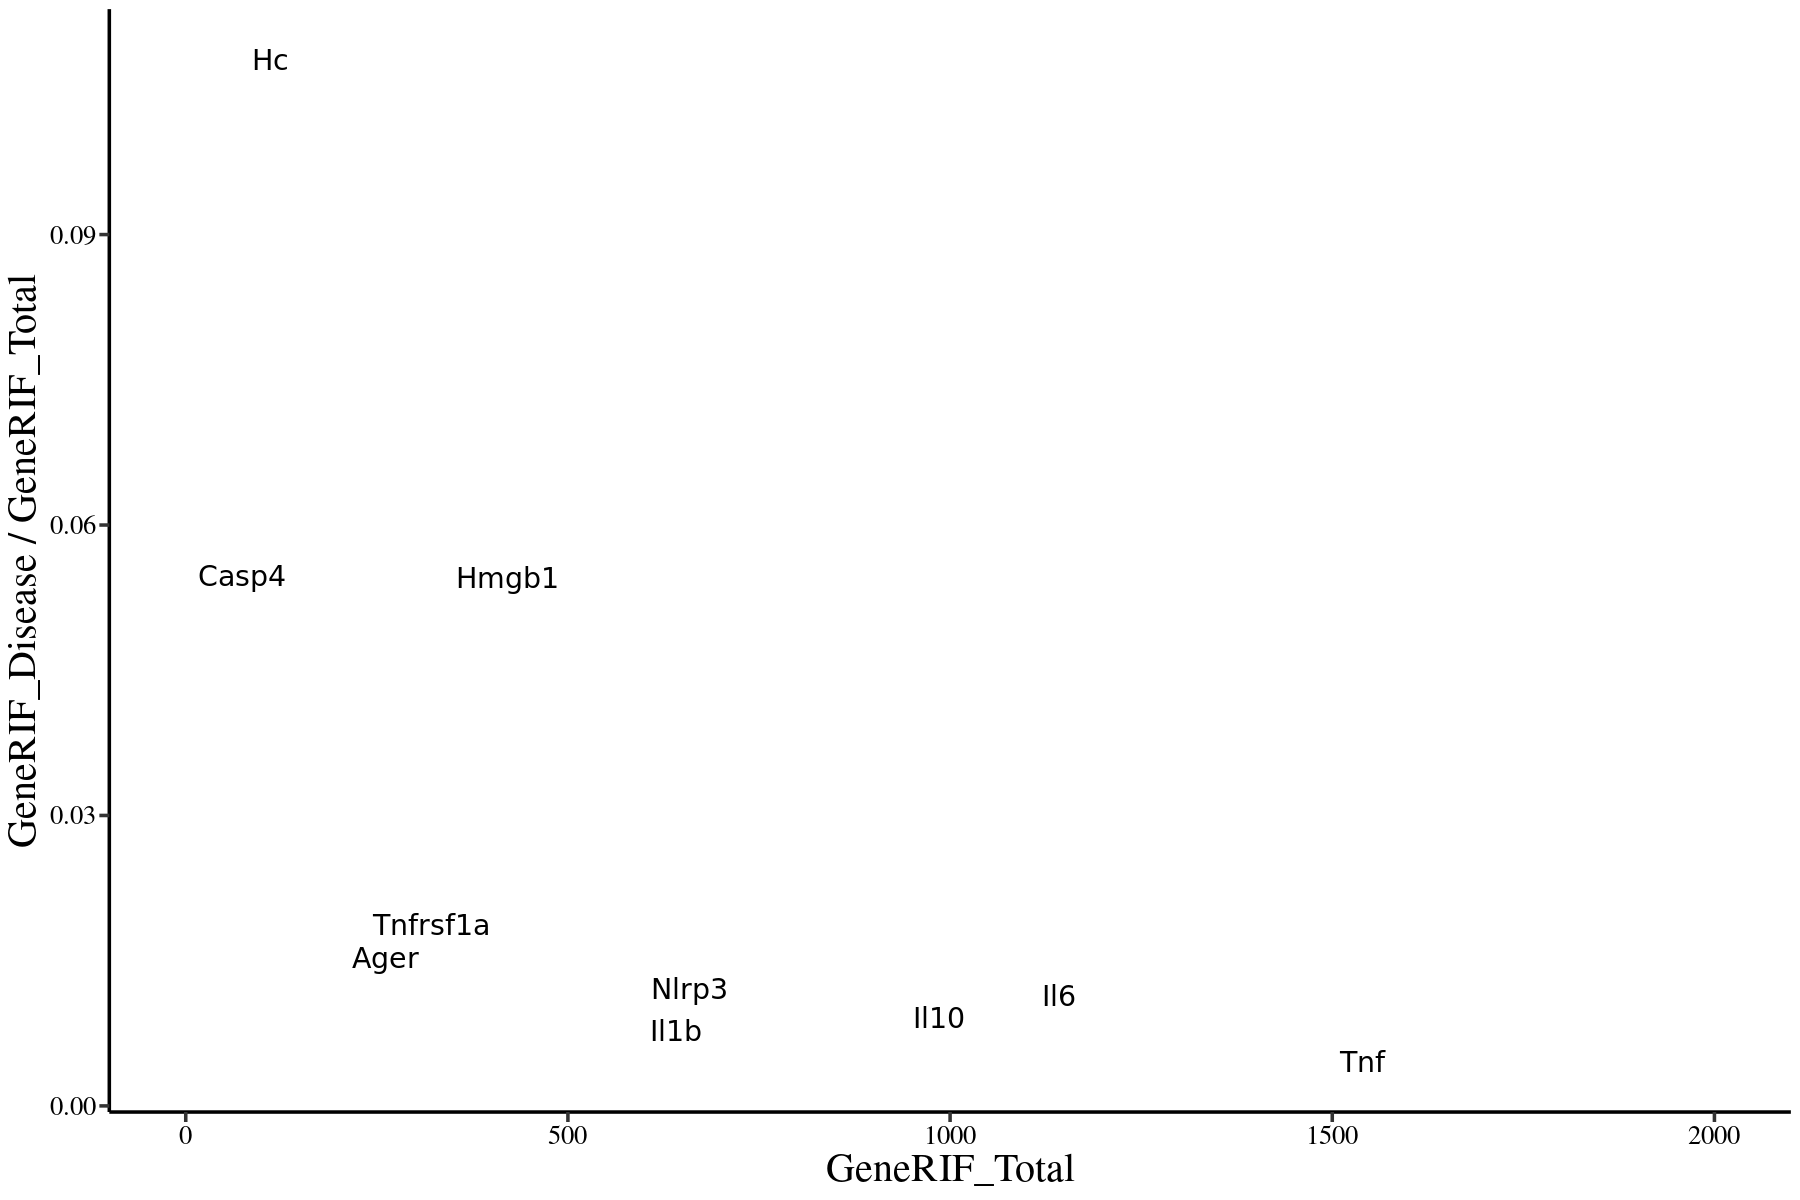

In [36]:
# Make a scatter plot of top genes
#head(GeneRIF_Disease1_Plot)
options(repr.plot.width = 15, repr.plot.height = 10)
plot_s <- ggplot(GeneRIF_Disease1_Plot, aes(GeneRIF_Total, GeneRIF_D1/GeneRIF_Total))
plot_s <- plot_s +
          geom_text(label = GeneRIF_Disease1_Plot$GeneSymbol2, check_overlap = TRUE, size = 6) +
labs(x = "GeneRIF_Total", y ="GeneRIF_Disease / GeneRIF_Total") + xlim(0,2000) 
#plot_s
plot_s2 <- plot_s + theme_classic() + 
theme(axis.text = element_text(family="Times",size=16, color = "black",margin(t = 0, r = 0, b = 30, l = 30)),
      axis.title=element_text(family="Times",size=24), 
      axis.line = element_line(colour = "black", size=1),
      axis.ticks = element_line(size = 1), 
      axis.ticks.length = unit(6, "pt"))  
 
plot_s2
ggsave(str_c(getwd(),"/output/GeneRIFscatterplotWithNames.pdf"),plot=plot_s2, height=10, width=15, units="in", dpi=150)

# check output files
dir(str_c(getwd(),"/output/"))

In [37]:
# Plot number of genes with disease annotated GeneRIFs by organ 
PlotbyOrgan  <-  SummaryGeneRIFCountByDEGs %>%
filter(!is.na(GeneRIF_D1)) %>%
select(GeneSymbol,Organ) %>%
group_by(Organ) %>%
count() 

PlotbyOrgan

Organ,n
<chr>,<int>
BM,46
HE,32
LU,38


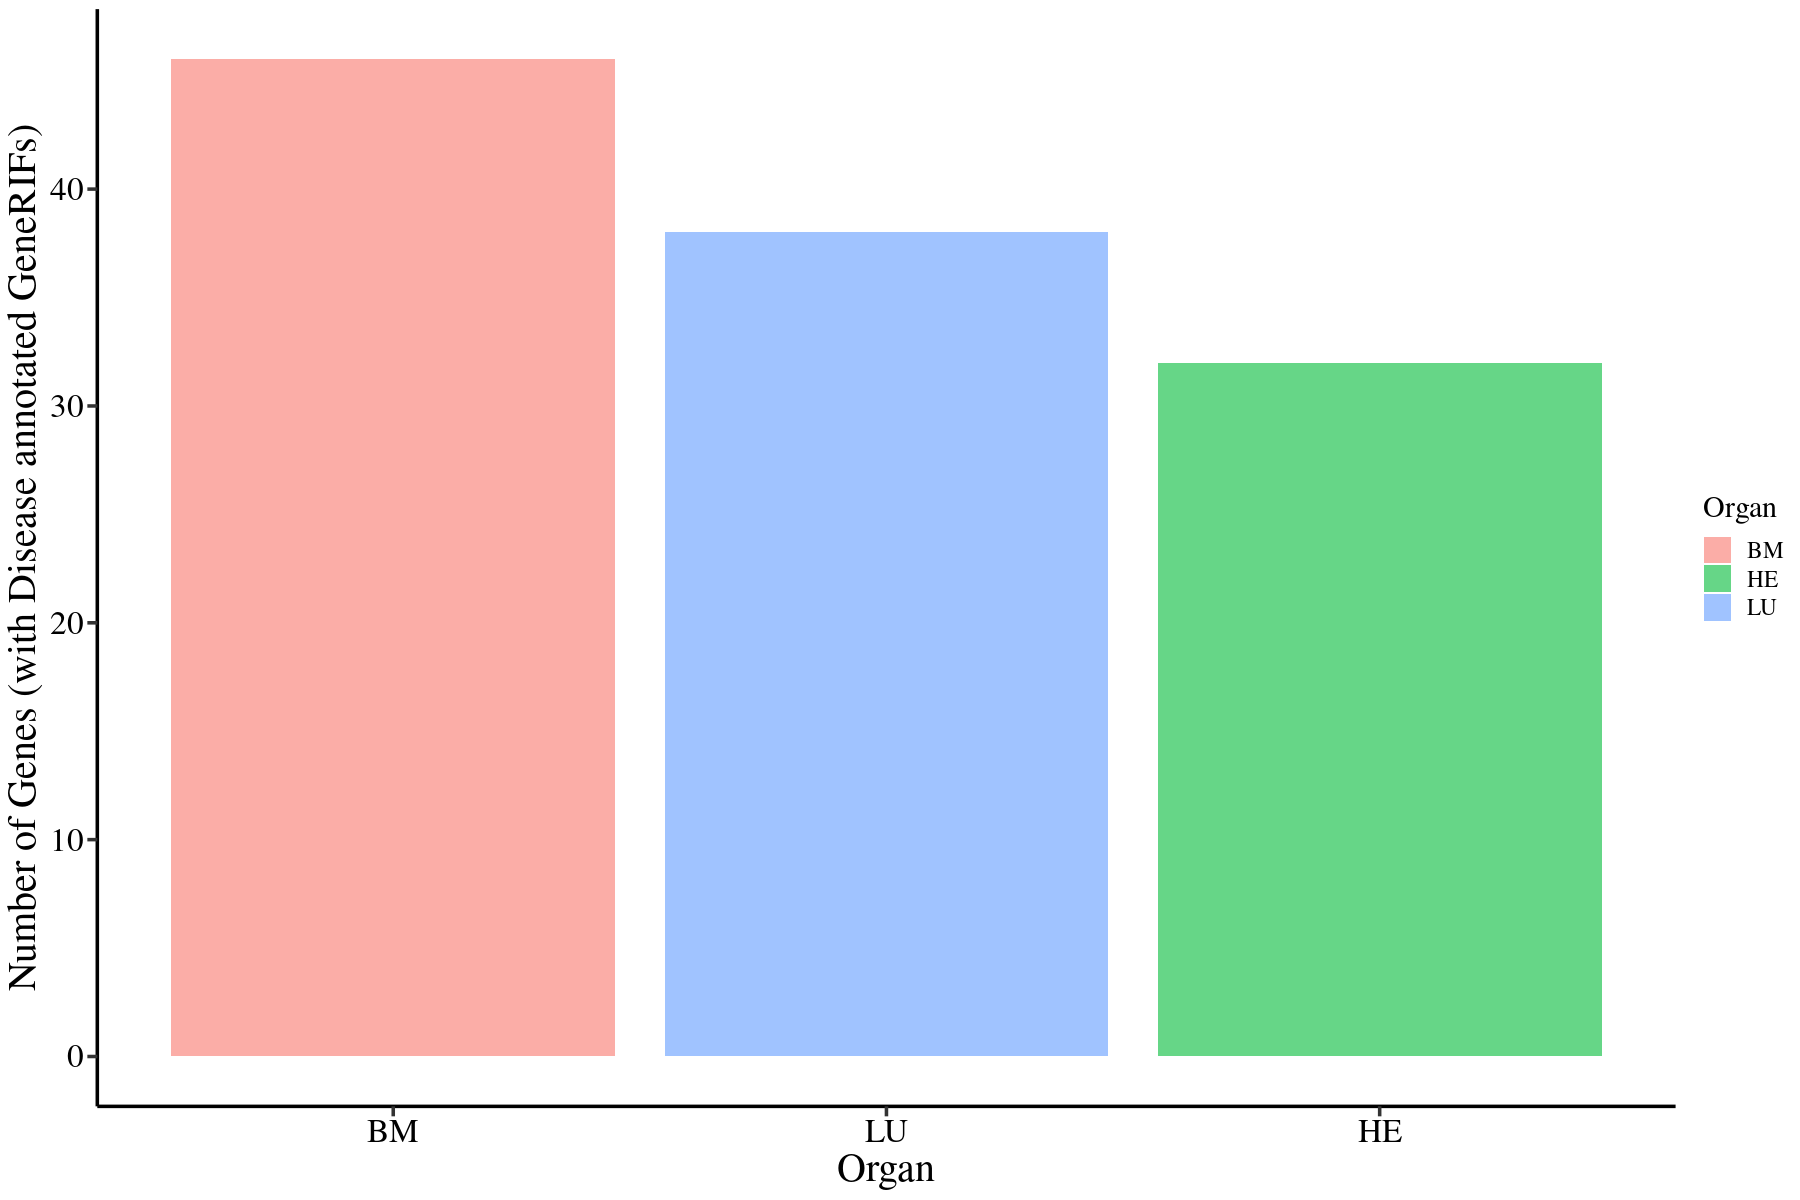

In [38]:
# by organ
options(repr.plot.width = 15, repr.plot.height =10)

plotOrgan <-  ggplot(PlotbyOrgan , aes(fct_rev(fct_reorder(Organ, n)),n, fill = Organ)) + 
geom_col(alpha =0.6) +
labs(x ="Organ", y ="Number of Genes (with Disease annotated GeneRIFs)") 
plotGeneCountByOrgan <- plotOrgan + theme_classic() + 
                       theme_classic() + 
                       theme(axis.text=element_text(family="Times",size=20, 
                                                    color = "black",
                                                    margin(t = 0, r = 0, b = 30, l = 30)),
                             axis.title=element_text(family="Times",size=24), 
                             axis.line = element_line(colour = "black", size=1),
                             axis.ticks = element_line(size = 1), 
                             axis.ticks.length = unit(6, "pt")) + 
                       theme(legend.title=element_text(size=18,family="Times" ),
                             legend.text=element_text(size=14, family="Times"))
plotGeneCountByOrgan
ggsave(str_c(getwd(),"/output/GeneRIFsPlotbyOrgan.pdf"),plot=plotGeneCountByOrgan, height=10, width=15, units="in", dpi=150)

In [39]:
#by organ and timepoint
PlotbyOrgan_Timepoint  <-  SummaryGeneRIFCountByDEGs %>%
filter(!is.na(GeneRIF_D1)) %>%
select(GeneSymbol,Organ,Timepoint) %>%
group_by(Organ,Timepoint) %>%
count() %>%
ungroup()%>%
mutate(hour = str_replace_all(Timepoint, "h", ""))

PlotbyOrgan_Timepoint



Organ,Timepoint,n,hour
<chr>,<chr>,<int>,<chr>
BM,h12,16,12
BM,h24,18,24
BM,h6,12,6
HE,h12,3,12
HE,h24,5,24
HE,h6,24,6
LU,h12,18,12
LU,h24,7,24
LU,h6,13,6


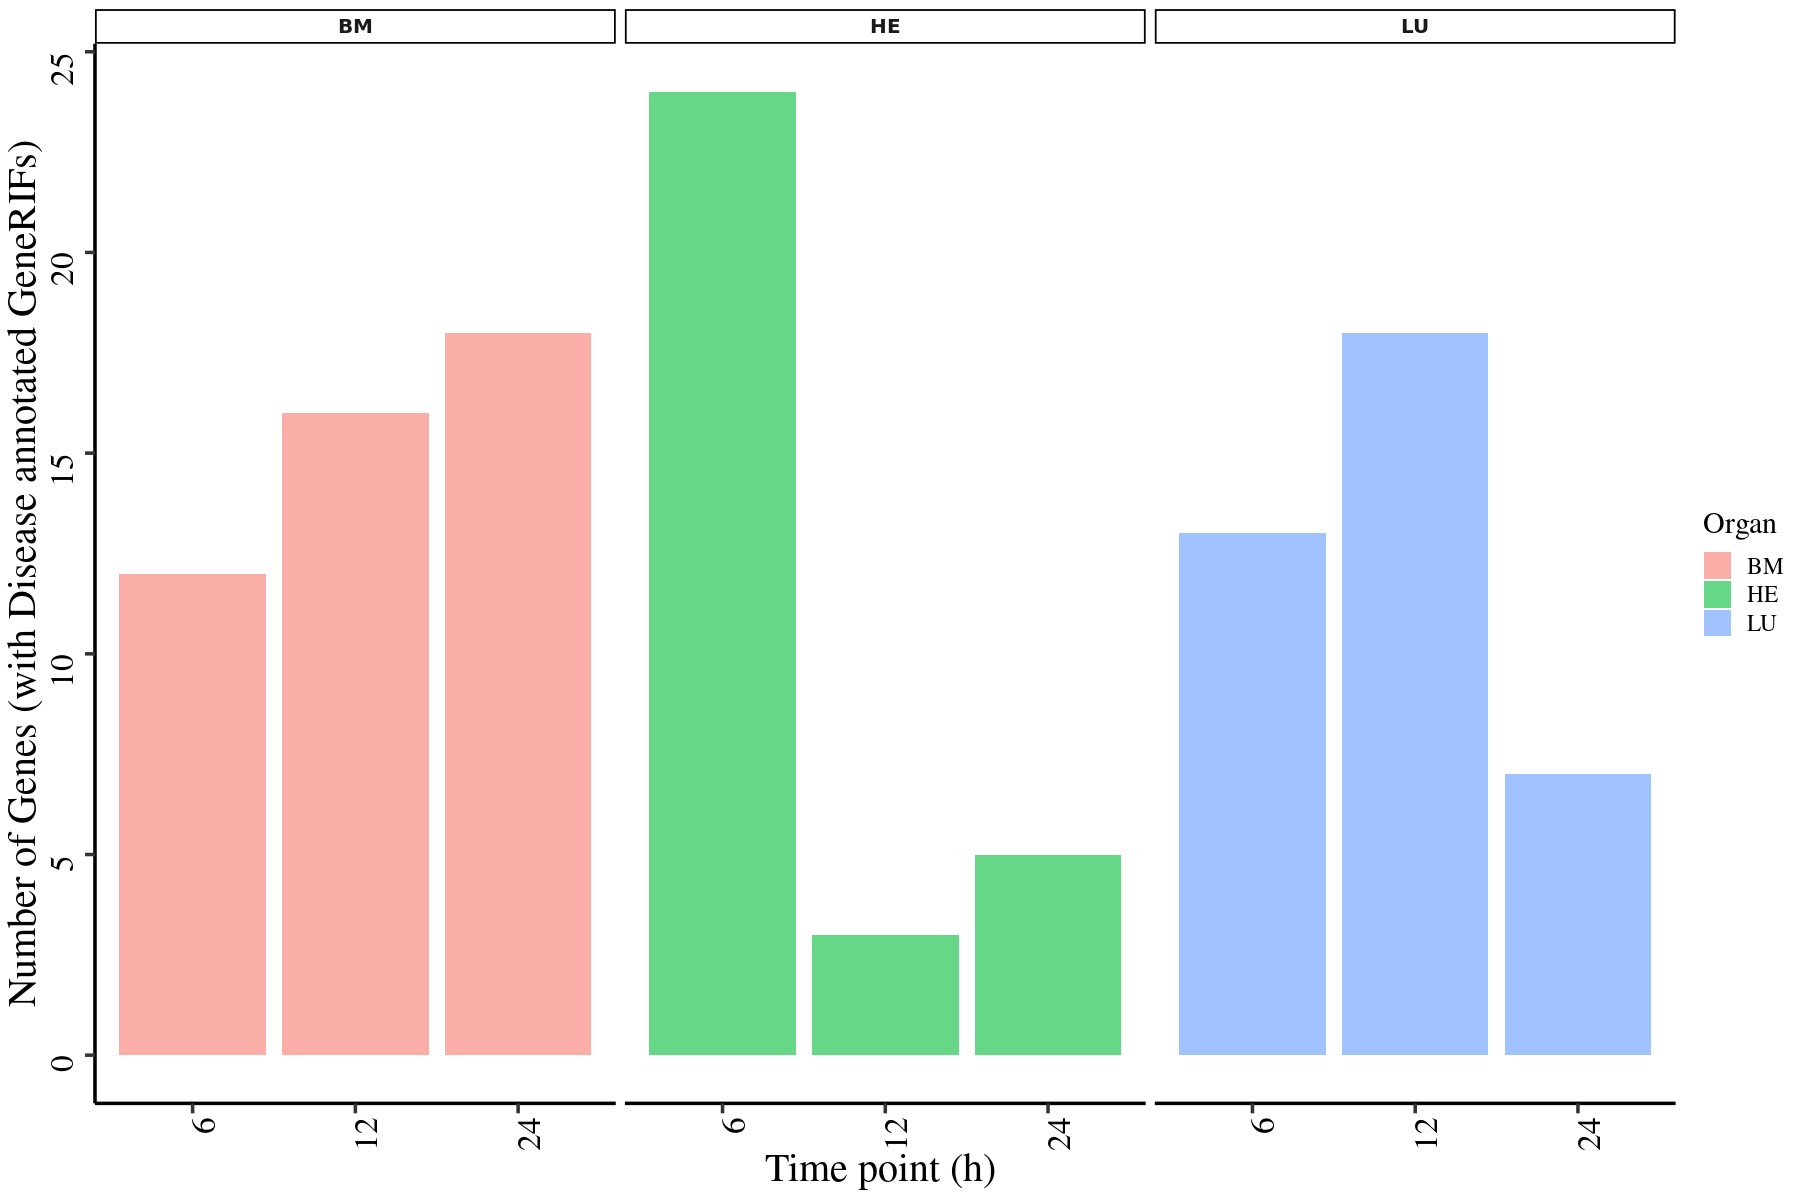

In [40]:
#make a plot with number of genes by timepoint and organ.
options(repr.plot.width = 15, repr.plot.height =10)
plotOrganTimepoint <- ggplot(PlotbyOrgan_Timepoint, aes(x= factor(hour, levels = c('6','12','24')),n, fill = Organ)) + 
geom_col(position="dodge", alpha = 0.6) +
facet_wrap( ~ Organ, ncol=3, scales ="free_x") + 
labs(x = "Time point (h) ", y = "Number of Genes (with Disease annotated GeneRIFs)") 
plotOrganTimepoint <- plotOrganTimepoint + theme_classic() + 
                                          theme(axis.text=element_text(angle = 90, 
                                                                       vjust = 1, hjust=1,
                                                                       family="Times",size=20, 
                                                                       color = "black",
                                                                       margin(t = 0, r = 0, b = 30, l = 30)),
                                                axis.title=element_text(family="Times",size=24), 
                                                axis.line = element_line(colour = "black", size=1),
                                                axis.ticks = element_line(size = 1), 
                                                axis.ticks.length = unit(6, "pt")) + 
                                           theme(legend.title=element_text(size=18,family="Times" ),
                                                 legend.text=element_text(size=14, family="Times"),
                                                strip.text.x = element_text(size = 12, face = "bold"))

plotOrganTimepoint
ggsave(str_c(getwd(),"/output/GeneRIFsPlotbyOrganTimepoint.pdf"),plot=plotOrganTimepoint, height=10, width=15, units="in", dpi=150)

In [41]:
# functional Annotation of Genes using KEGG database (Kyoto Encyclopedia of Genes and Genomes)
#GeneRIF_Disease1_Plot %>%
#select(GeneSymbol2)
# DAVID (the Database for Annotation, Visualization and Integrated Discovery)
#enrichment of top 10 genes
KEGGFile <- fread("FunctionalAnnotationKEGG.csv")
head(KEGGFile,2)

# Make  file for plot
DiseasePathway <- KEGGFile %>%
select(Term, FDR) %>%
mutate(Term2 = str_replace_all(Term , pattern = "^mmu[0-9*:]+", "")) %>%
select(-Term) %>%
rename(Term = Term2)


tail(DiseasePathway,2)

Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_PATHWAY,mmu05133:Pertussis,6,0.5267779,1.49e-09,"IL10, IL6, IL1B, NLRP3, HC, TNF",8,74,7691,77.94932,9.37e-08,9.37e-08,9.37e-08
KEGG_PATHWAY,mmu05142:Chagas disease (American trypanosomiasis),5,0.4389816,1.03e-06,"IL10, IL6, IL1B, TNF, TNFRSF1A",8,103,7691,46.66869,6.49e-05,3.24e-05,3.24e-05


,FDR,Term
,<dbl>,<chr>
24,0.01390936,Osteoclast differentiation
25,0.01802980,Systemic lupus erythematosus


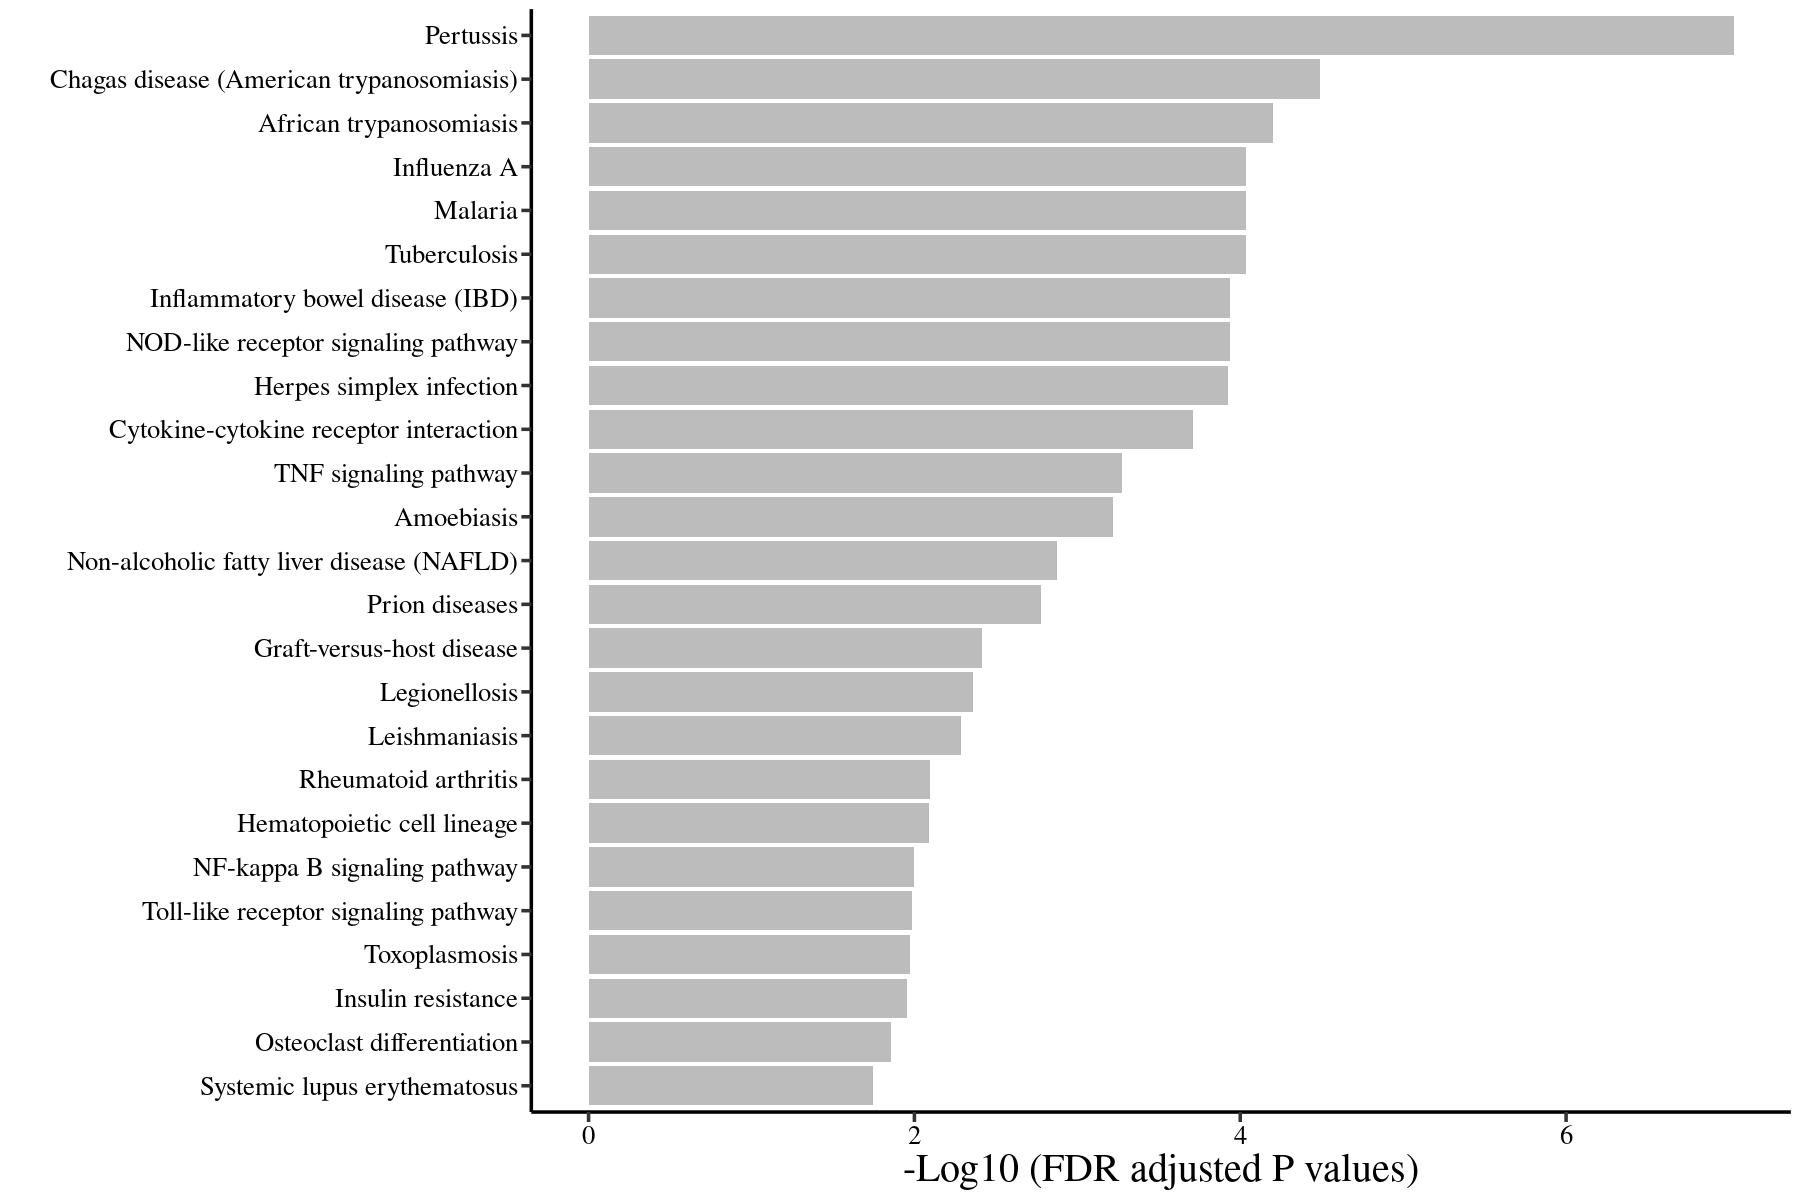

In [42]:
# Let's plot
options(repr.plot.width = 15, repr.plot.height =10)
plotPathways <- ggplot(DiseasePathway, aes(fct_rev(fct_reorder(Term,FDR)), -log10(FDR))) + 
geom_col(alpha=0.4) +
coord_flip() + 
labs(x ="", y ="-Log10 (FDR adjusted P values)") 
plotPathways <- plotPathways + 
                theme_classic() + 
                theme(axis.text=element_text(family="Times",
                                             size=16, 
                                             color = "black",
                                             margin(t = 0, r = 0, b = 30, l = 30)),
                      axis.title=element_text(family="Times",size=24), 
                      axis.line = element_line(colour = "black", size=1), 
                      axis.ticks = element_line(size = 1), 
                      axis.ticks.length = unit(6, "pt")) 
plotPathways
ggsave(str_c(getwd(),"/output/FunctionalAnnotationPlot.pdf"),plot=plotPathways, height=10, width=15, units="in", dpi=150)